# PROYECTO MODELOS AVANZADOS 1 - GRUPO 5

## Integrantes:

#### Denis Leonardo Jaimes Campos | Código: 202027884.
#### Esteban López Zúñiga | Código: 200914313.
##### Oscar Hernando Ayala Nino | Código: 201920024.
##### Sebastián Camilo Camargo Bello | Código: 201014774.
##### Sindy Lorena Murcia Florez | Código: 202028060.

# Caso de estudio: Consumo de energía en región de la India

## 2. Descripción de los datos y pregunta clave:

La base cuenta con 498 registros históricos del consumo diario de energía per cápita para cada uno de los 9 estados que conforman la región de NR en la India. Esta región, de acuerdo con noticias recientes, ha sufrido de caídas en los servicios de energía por el alto consumo de la misma así como una limitada capacidad de la planta eléctrica que actualmente abastece la región.

Para ello, se busca realizar un análisis con estos datos (de 2019 a 2020) con el fin de determinar los periodos/temporadas de mayor consumo en el año, esto en pro de que el gobierno de esta nación pueda tomar decisiones y establecer políticas que incentiven actividades de baja demanda de energía.







### ¿Cuáles son las temporadas de mayor consumo de energía en la región de NR?

In [1]:
# Cargue de la información:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dljaimes/Advanced-Methods-in-Data-Analysis_1_Grupo_5/main/Proyecto_1/bd_proyecto_1_grupo_5.csv',
                sep=',')

In [5]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [7]:
# Se filtran los estados de la región NR y se ajusta el formato de fecha

df = df.query('Regions == "NR" ')
df.Dates = pd.to_datetime(df.Dates)

# Se crea tabla pivot:
df =  pd.pivot_table(df, index='Dates', columns='States', values='Usage')

# Se crea el total de consumo por los estados de la región NR
df['consumo_total'] = df.sum(axis=1)

C:\Users\Leonardo\anaconda3\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
# Base ajustada:

df.head()

States,Chandigarh,Delhi,HP,Haryana,J&K,Punjab,Rajasthan,UP,Uttarakhand,consumo_total
Dates,,,,,,,,,,
2019-01-07,4.8,103.8,24.2,157.5,34.8,163.9,180.9,379.4,33.9,1083.2
2019-01-08,5.5,99.3,29.4,140.6,44.9,206.1,223.7,384.1,42.6,1176.2
2019-01-09,5.4,113.9,30.5,200.4,39.1,224.0,240.5,350.6,40.2,1244.6
2019-01-10,3.9,80.7,27.8,142.9,39.9,118.9,208.4,316.5,34.9,973.9
2019-01-11,2.4,52.4,12.1,79.7,40.7,78.2,159.5,271.0,20.1,716.1


# 3. Entendimiento de los datos

###### Estacionalidad,
###### Ciclicidad,
###### Autocorrelacion, 
###### Comportamiento de los residuos, 
###### Among others.

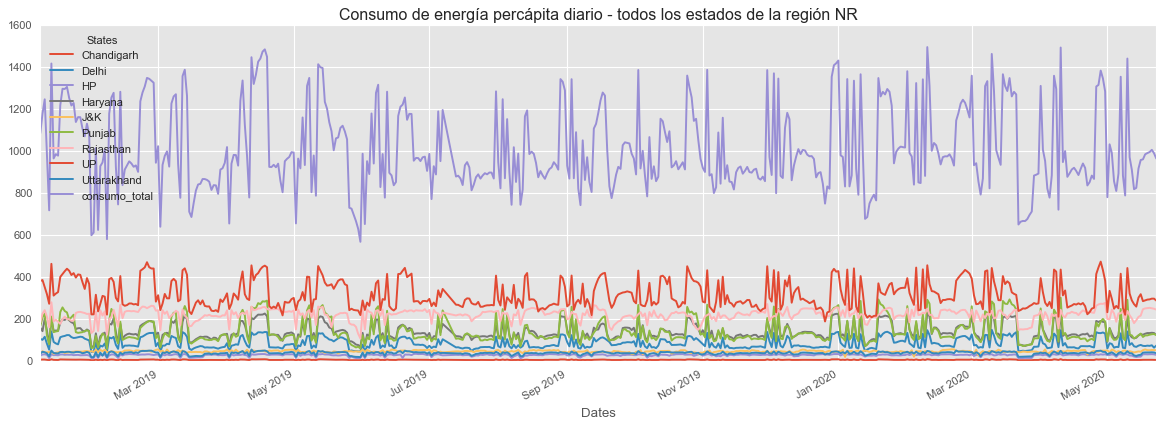

In [24]:
plt.style.use('ggplot')
df.plot(figsize=(18,6), legend=True)
plt.title('Consumo de energía percápita diario - todos los estados de la región NR');

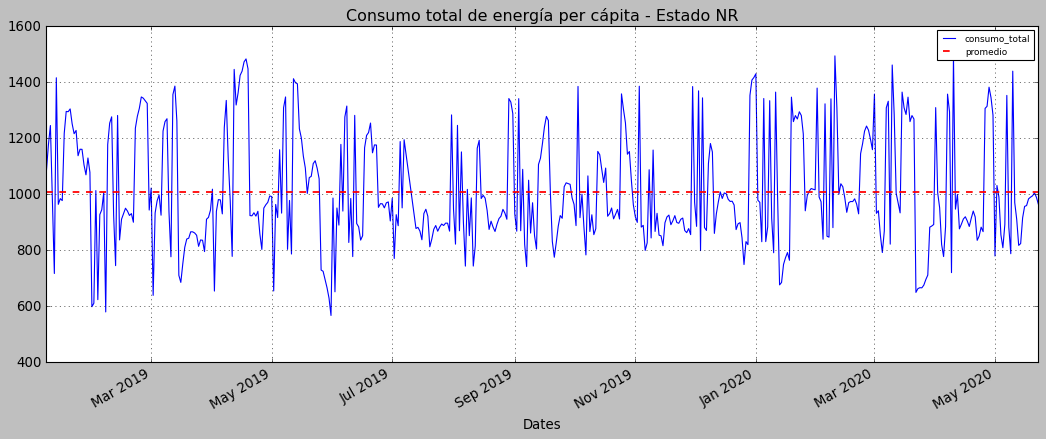

In [32]:
df['consumo_total'].plot(figsize=(16,6), grid=True)
plt.title('Consumo total de energía per cápita - Estado NR')
plt.axhline(df['consumo_total'].mean(), color='red', linewidth=1.6, linestyle="dashed", label='promedio')
plt.legend(fontsize=8);

### 3.1 Estacionalidad

Se observa el comportamiento de las diferencias para ver estacionalidad de la serie.

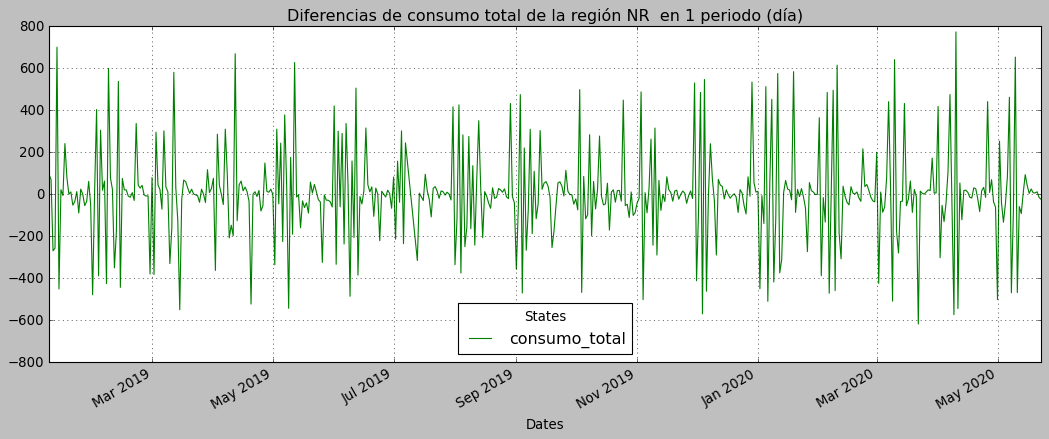

In [40]:
# Se genera la diferencia de un día para ver su comportamiento:
periodo = 1

df[['consumo_total']].diff(periodo).plot(figsize=(16,6), grid=True,color='green')
plt.title('Diferencias de consumo total de la región NR  en {} periodo (día)'.format(periodo));

Se observa como las diferencias más grandes en el consumo diario de energía de un día a otro, van teniendo 'picos' más altos despues de cierto periodo de tiempo (al rededor de 10 días)

### 3.2 Tendencia

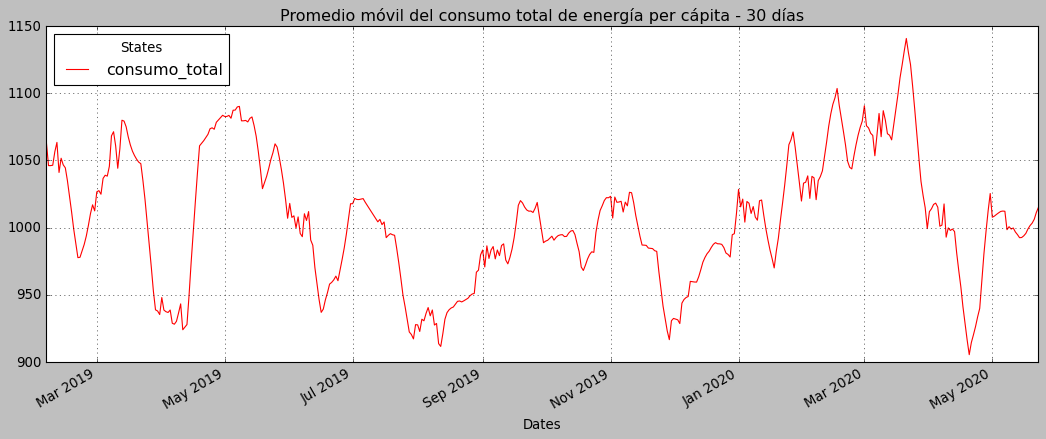

In [42]:
# Se grafica la tendidencia de la serie usando el promedio móvil

prom_movil = 30

df[['consumo_total']].rolling(prom_movil).mean().plot(figsize=(16,6), grid=True,color='red')
plt.title('Promedio móvil del consumo total de energía per cápita - {} días'.format(prom_movil));

Se observa como el promedio de consumo per cápita de energía para 30 días, presenta altibajos a lo largo del periodo de medición: Sube y baja constantemente sin una tendencia marcada.

### 3.3. Autocorrelación

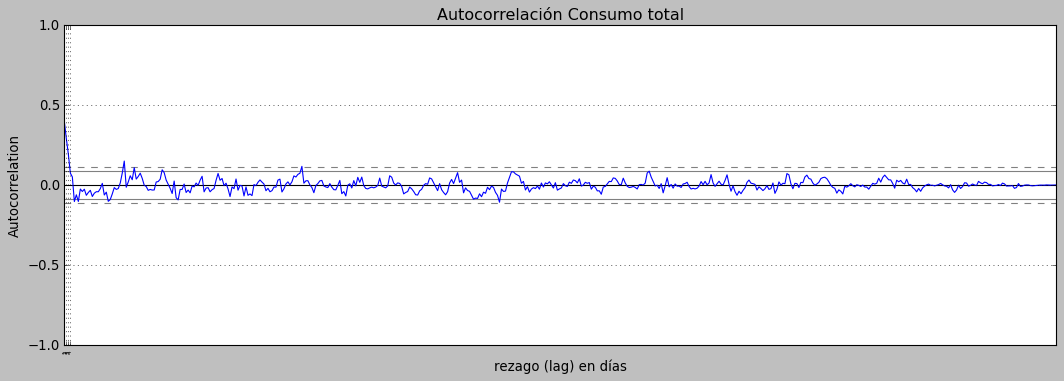

In [52]:
plt.figure(figsize=(16,5))
pd.plotting.autocorrelation_plot(df['consumo_total'])
plt.title('Autocorrelación Consumo total')
plt.xticks(np.arange(1,5), rotation=90, fontsize=5)
plt.xlabel('rezago (lag) en días');

Se observa con el gráfico de autocorrelación que la serie de consumo total de energía tiene una periodicidad de 4 días, esto dado que las autocorrelaciones para rezagos más grandes son más pequeñas (se encuentran casi todas dentro del intervalo de confianza para una autocorrelación cercana a cero.

### 3.4. Prueba de dickey-fuller para evaluar estacionariedad de la serie

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
adfuller(df['consumo_total'])

(-8.990029029696228,
 6.931983070073212e-15,
 5,
 492,
 {'1%': -3.4437112724287253,
  '5%': -2.8674324209387345,
  '10%': -2.569908433637385},
 6341.943447936858)

Dado que el p_value es < 0.05 (0.0000) , no se acepta H0 (rho - 1 = 0): Rho es estadísticamente igual a 1, 
es decir, Rho -1 es estadísticamente diferente a 0. Como resultado del test, la serie es estacionaria.

## 4. Aplicación de modelos:


In [57]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 4.1. Validación del modelo: ¿es autoregresivo o de media movil?

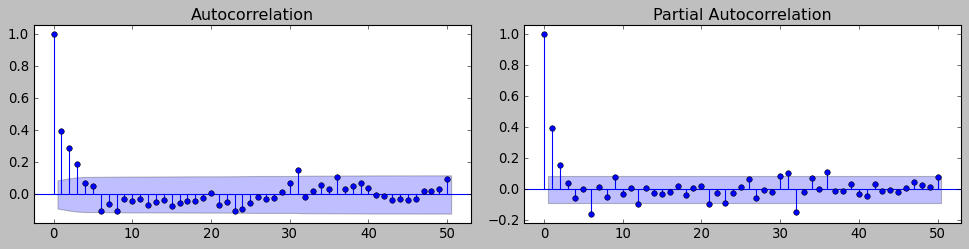

In [70]:
fig, axis=plt.subplots(1,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,
figsize=(12,3))
fig.figsize=(12,5)

plot_acf(df[['consumo_total']], lags=50,ax=axis[0,0])
plot_pacf(df[['consumo_total']], lags=50,ax=axis[0,1]);


In [65]:
df.columns

Index(['Chandigarh', 'Delhi', 'HP', 'Haryana', 'J&K', 'Punjab', 'Rajasthan',
       'UP', 'Uttarakhand', 'consumo_total'],
      dtype='object', name='States')

In [ ]:
model = ARIMA(df['consumo_total'], order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())